In [52]:
from simulator import Simulator
from q import QPlayer
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import numpy as np
from player import *
from mcts import MCTSPlayer

### 1. Training QPlayer with 3 Lv1 QPlayers

In [22]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts
Q_saved = pickle.load(open('q_weights', 'rb'))
N_saved = pickle.load(open('n_weights', 'rb'))
Q2_saved = pickle.load(open('q2_weights', 'rb'))
N2_saved = pickle.load(open('n2_weights', 'rb'))

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_1 = []
for i in range(150000):
    # sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, QPlayer],
    #                          params=[{}, {}, {},
    #                                    {'Q': Q_new, 'N': N_new,
    #                                     'c': .01,
    #                                     'depth': 100,
    #                                     'num_simulations': 10,
    #                                     'alpha': 0.1}],
    #                            verbosity=0)
    sim = Simulator.from_start([QPlayer, QPlayer, QPlayer, QPlayer],
                             params=[{'Q': Q_saved, 'N': N_saved,
                                        'c': .01,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.1,
                                        'learn': False}]*3 + \
                                       [{'Q': Q_new, 'N': N_new,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05}] * 1,
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 1000 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_1.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)

0
[0 0 1 0 0]
[0 0 1 0 0]
0.0
0.0
1000
[305 312 307  62  15]
[305 312 306  62  15]
6.193806193806194
6.2
2000
[634 593 629 115  30]
[329 281 322  53  15]
5.747126436781609
5.3
3000
[979 876 930 173  43]
[345 283 301  58  13]
5.7647450849716755
5.800000000000001
4000
[1305 1168 1224  248   56]
[326 292 294  75  13]
6.198450387403149
7.5
5000
[1660 1459 1487  333   62]
[355 291 263  85   6]
6.65866826634673
8.5
6000
[1963 1739 1761  464   74]
[303 280 274 131  12]
7.732044659223463
13.100000000000001
7000
[2299 2004 2009  603   86]
[336 265 248 139  12]
8.613055277817455
13.900000000000002
8000
[2589 2279 2273  753  107]
[290 275 264 150  21]
9.411323584551932
15.0
9000
[2881 2560 2527  917  116]
[292 281 254 164   9]
10.187756915898232
16.400000000000002
10000
[3154 2813 2804 1109  121]
[273 253 277 192   5]
11.08889111088891
19.2
11000
[3423 3060 3063 1323  132]
[269 247 259 214  11]
12.026179438232889
21.4
12000
[3679 3311 3334 1539  138]
[256 251 271 216   6]
12.823931339055077
21.6


98000
[13078 13489 15194 55431   809]
[ 53  87  86 764  10]
56.56166773808431
76.4
99000
[13126 13572 15288 56200   815]
[ 48  83  94 769   6]
56.767103362592295
76.9
100000
[13174 13641 15388 56977   821]
[ 48  69 100 777   6]
56.97643023569764
77.7
101000
[13234 13712 15474 57752   829]
[ 60  71  86 775   8]
57.17963188483283
77.5
102000
[13291 13784 15561 58529   836]
[ 57  72  87 777   7]
57.3808099920589
77.7
103000
[13348 13860 15643 59309   841]
[ 57  76  82 780   5]
57.58099435927807
78.0
104000
[13401 13918 15734 60100   848]
[ 53  58  91 791   7]
57.78790588552033
79.10000000000001
105000
[13451 14007 15808 60884   851]
[ 50  89  74 784   3]
57.98420967419358
78.4
106000
[13495 14085 15903 61661   857]
[ 44  78  95 777   6]
58.17020594145338
77.7
107000
[13542 14148 15988 62462   861]
[ 47  63  85 801   4]
58.375155372379695
80.10000000000001
108000
[13595 14213 16072 63257   864]
[ 53  65  84 795   3]
58.570753974500235
79.5
109000
[13661 14278 16159 64028   875]
[ 66  65  8

Text(0, 0.5, '% of winning (over the last 1000 games)')

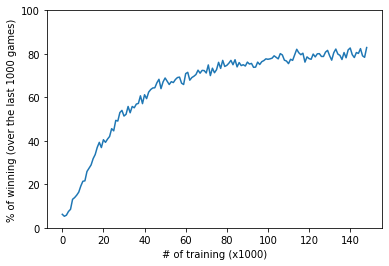

In [23]:
plt.plot(rates_1[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")
# plt.xticks(range(149), np.arange(1000, 150000, 1000))

### 2. Training QPlayer with 3 RandomPlayers

In [24]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_2 = []
for i in range(150000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, QPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_new, 'N': N_new,
                                        'c': .01,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.1}],
                               verbosity=0)
#     sim = Simulator.from_start([QPlayer, QPlayer, QPlayer, QPlayer],
#                              params=[{'Q': Q_saved, 'N': N_saved,
#                                         'c': .01,
#                                         'depth': 100,
#                                         'num_simulations': 10,
#                                         'alpha': 0.1,
#                                         'learn': False}]*3 + \
#                                        [{'Q': Q_new, 'N': N_new,
#                                         'c': .1,
#                                         'depth': 100,
#                                         'num_simulations': 10,
#                                         'alpha': 0.05}] * 1,
#                                verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 1000 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_2.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)

0
[1 0 0 0 0]
[1 0 0 0 0]
0.0
0.0
1000
[204 256 263 278   0]
[203 256 263 278   0]
27.77222777222777
27.800000000000004
2000
[364 465 481 691   0]
[160 209 218 413   0]
34.53273363318341
41.3
3000
[ 538  613  684 1166    0]
[174 148 203 475   0]
38.853715428190604
47.5
4000
[ 686  752  864 1699    0]
[148 139 180 533   0]
42.464383904024
53.300000000000004
5000
[ 792  885 1034 2290    0]
[106 133 170 591   0]
45.79084183163367
59.099999999999994
6000
[ 904 1017 1172 2908    0]
[112 132 138 618   0]
48.45859023496084
61.8
7000
[1003 1152 1302 3544    0]
[ 99 135 130 636   0]
50.621339808598776
63.6
8000
[1072 1268 1438 4223    0]
[ 69 116 136 679   0]
52.7809023872016
67.9
9000
[1166 1369 1556 4910    0]
[ 94 101 118 687   0]
54.54949450061104
68.7
10000
[1255 1471 1670 5605    0]
[ 89 102 114 695   0]
56.04439556044396
69.5
11000
[1350 1574 1799 6278    0]
[ 95 103 129 673   0]
57.067539314607764
67.30000000000001
12000
[1444 1667 1906 6984    0]
[ 94  93 107 706   0]
58.19515040413299

97000
[ 6048  6994  9250 74709     0]
[ 45  47  54 854   0]
77.01879362068432
85.39999999999999
98000
[ 6089  7043  9323 75546     0]
[ 41  49  73 837   0]
77.08696850032143
83.7
99000
[ 6137  7099  9395 76370     0]
[ 48  56  72 824   0]
77.14063494308138
82.39999999999999
100000
[ 6180  7151  9458 77212     0]
[ 43  52  63 842   0]
77.21122788772112
84.2
101000
[ 6226  7207  9528 78040     0]
[ 46  56  70 828   0]
77.26656171721072
82.8
102000
[ 6266  7269  9601 78865     0]
[ 40  62  73 825   0]
77.31786943265261
82.5
103000
[ 6314  7326  9685 79676     0]
[ 48  57  84 811   0]
77.35458879040009
81.10000000000001
104000
[ 6347  7378  9765 80511     0]
[ 33  52  80 835   0]
77.41367871462774
83.5
105000
[ 6407  7430  9829 81335     0]
[ 60  52  64 824   0]
77.46116703650442
82.39999999999999
106000
[ 6453  7480  9895 82173     0]
[ 46  50  66 838   0]
77.52096678333224
83.8
107000
[ 6506  7531  9973 82991     0]
[ 53  51  78 818   0]
77.56095737423014
81.8
108000
[ 6551  7584 10043 8

Text(0, 0.5, '% of winning (over the last 1000 games)')

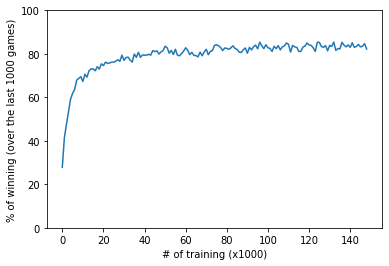

In [25]:
plt.plot(rates_2[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")
# plt.xticks(range(149), np.arange(1000, 150000, 1000))

### 3. Training QPlayer with 3 Lv2 QPlayers

In [45]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts
Q_saved = pickle.load(open('q3_weights', 'rb'))
N_saved = pickle.load(open('n3_weights', 'rb'))

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_3 = []
for i in range(250000):
    sim = Simulator.from_start([QPlayer, QPlayer, QPlayer, QPlayer],
                             params=[{'Q': Q_saved, 'N': N_saved,
                                        'c': .01,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.1,
                                        'learn': False}]*3 + \
                                       [{'Q': Q_new, 'N': N_new,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05}] * 1,
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 1000 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_3.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)

pickle.dump(Q_new, open('q4_weights', 'wb'))
pickle.dump(N_new, open('n4_weights', 'wb'))

0
[0 0 1 0 0]
[0 0 1 0 0]
0.0
0.0
1000
[263 348 356   9  25]
[263 348 355   9  25]
0.8991008991008992
0.8999999999999999
2000
[526 658 743  21  53]
[263 310 387  12  28]
1.0494752623688157
1.2
3000
[ 805  985 1102   34   75]
[279 327 359  13  22]
1.13295568143952
1.3
4000
[1084 1303 1471   45   98]
[279 318 369  11  23]
1.1247188202949263
1.0999999999999999
5000
[1349 1647 1838   55  112]
[265 344 367  10  14]
1.0997800439912018
1.0
6000
[1624 1961 2218   65  133]
[275 314 380  10  21]
1.0831528078653558
1.0
7000
[1901 2299 2565   79  157]
[277 338 347  14  24]
1.1284102271104128
1.4000000000000001
8000
[2208 2594 2931   92  176]
[307 295 366  13  19]
1.149856267966504
1.3
9000
[2484 2914 3300  100  203]
[276 320 369   8  27]
1.1109876680368846
0.8
10000
[2751 3255 3649  119  227]
[267 341 349  19  24]
1.1898810118988101
1.9
11000
[3030 3589 3981  146  255]
[279 334 332  27  28]
1.3271520770839014
2.7
12000
[3297 3921 4339  171  273]
[267 332 358  25  18]
1.4248812598950087
2.5
13000
[

96000
[20872 26268 28181 18967  1713]
[154 207 205 421  13]
19.75708586368892
42.1
97000
[21016 26491 28378 19387  1729]
[144 223 197 420  16]
19.986391892867083
42.0
98000
[21187 26708 28593 19771  1742]
[171 217 215 384  13]
20.174283935878208
38.4
99000
[21351 26902 28799 20186  1763]
[164 194 206 415  21]
20.389693033403702
41.5
100000
[21507 27140 29021 20552  1781]
[156 238 222 366  18]
20.55179448205518
36.6
101000
[21667 27365 29223 20947  1799]
[160 225 202 395  18]
20.739398619815645
39.5
102000
[21831 27571 29432 21353  1814]
[164 206 209 406  15]
20.93410848913246
40.6
103000
[21979 27790 29635 21773  1824]
[148 219 203 420  10]
21.138629722041532
42.0
104000
[22140 27966 29862 22195  1838]
[161 176 227 422  14]
21.341140950567784
42.199999999999996
105000
[22284 28191 30085 22592  1849]
[144 225 223 397  11]
21.515985562042268
39.7
106000
[22419 28412 30284 23029  1857]
[135 221 199 437   8]
21.72526674276658
43.7
107000
[22566 28609 30495 23453  1878]
[147 197 211 424  21

191000
[34161 44680 46363 62834  2963]
[114 166 195 511  14]
32.89720996225151
51.1
192000
[34285 44875 46541 63323  2977]
[124 195 178 489  14]
32.980557392930244
48.9
193000
[34399 45041 46722 63851  2988]
[114 166 181 528  11]
33.08324827332501
52.800000000000004
194000
[34534 45224 46884 64355  3004]
[135 183 162 504  16]
33.17250942005454
50.4
195000
[34669 45408 47064 64842  3018]
[135 184 180 487  14]
33.25213716852734
48.699999999999996
196000
[34796 45570 47255 65344  3036]
[127 162 191 502  18]
33.338605415278494
50.2
197000
[34908 45737 47439 65868  3049]
[112 167 184 524  13]
33.43536327226765
52.400000000000006
198000
[35028 45939 47623 66352  3059]
[120 202 184 484  10]
33.510941863929986
48.4
199000
[35159 46109 47808 66854  3071]
[131 170 185 502  12]
33.594806056250974
50.2
200000
[35276 46290 47973 67378  3084]
[117 181 165 524  13]
33.68883155584222
52.400000000000006
201000
[35404 46463 48161 67879  3094]
[128 173 188 501  10]
33.77047875383705
50.1
202000
[35515 46

Text(0, 0.5, '% of winning (over the last 1000 games)')

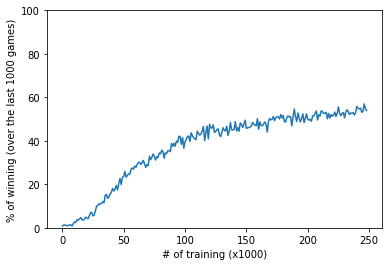

In [46]:
plt.plot(rates_3[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")

### 4. Training QPlayer with 3 HeuristicPlayers

In [42]:
winners = np.array([0, 0, 0, 0, 0])
for i in range(10000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, HeuristicPlayer],
                             params=[{}, {}, {}, {}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
print((winners[3] / np.sum(winners)) * 100)

55.26


In [30]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_4 = []
for i in range(150000):
    sim = Simulator.from_start([HeuristicPlayer, HeuristicPlayer, HeuristicPlayer, QPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_new, 'N': N_new,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 1000 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_4.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)

pickle.dump(Q_new, open('q_weights_heu', 'wb'))
pickle.dump(N_new, open('n_weights_heu', 'wb'))

0
[0 0 1 0 0]
[0 0 1 0 0]
0.0
0.0
1000
[  0  92 805 104   0]
[  0  92 804 104   0]
10.38961038961039
10.4
2000
[   0  214 1645  142    0]
[  0 122 840  38   0]
7.0964517741129445
3.8
3000
[   0  319 2461  221    0]
[  0 105 816  79   0]
7.364211929356881
7.9
4000
[   0  500 3102  399    0]
[  0 181 641 178   0]
9.972506873281679
17.8
5000
[   0  659 3533  809    0]
[  0 159 431 410   0]
16.176764647070584
41.0
6000
[   0  749 3800 1452    0]
[  0  90 267 643   0]
24.195967338776867
64.3
7000
[   0  795 3994 2212    0]
[  0  46 194 760   0]
31.595486359091556
76.0
8000
[   0  854 4141 3006    0]
[  0  59 147 794   0]
37.570303712035994
79.4
9000
[   0  882 4260 3859    0]
[  0  28 119 853   0]
42.873014109543384
85.3
10000
[   0  929 4346 4726    0]
[  0  47  86 867   0]
47.25527447255274
86.7
11000
[   0  983 4426 5592    0]
[  0  54  80 866   0]
50.83174256885737
86.6
12000
[   0 1023 4512 6466    0]
[  0  40  86 874   0]
53.87884342971419
87.4
13000
[   0 1062 4594 7345    0]
[  0  3

98000
[    0  1190  7394 89417     0]
[  0   2  28 970   0]
91.24090570504383
97.0
99000
[    0  1191  7427 90383     0]
[  0   1  33 966   0]
91.2950374238644
96.6
100000
[    0  1191  7460 91350     0]
[  0   0  33 967   0]
91.3490865091349
96.7
101000
[    0  1191  7485 92325     0]
[  0   0  25 975   0]
91.40998603974218
97.5
102000
[    0  1192  7512 93297     0]
[  0   1  27 972   0]
91.4667503259772
97.2
103000
[    0  1193  7535 94273     0]
[  0   1  23 976   0]
91.52629586120523
97.6
104000
[    0  1194  7565 95242     0]
[  0   1  30 969   0]
91.57796559648465
96.89999999999999
105000
[    0  1194  7594 96213     0]
[  0   0  29 971   0]
91.63055589946762
97.1
106000
[    0  1194  7627 97180     0]
[  0   0  33 967   0]
91.6783803926378
96.7
107000
[    0  1197  7660 98144     0]
[  0   3  33 964   0]
91.72250726628724
96.39999999999999
108000
[    0  1199  7684 99118     0]
[  0   2  24 974   0]
91.77507615670226
97.39999999999999
109000
[     0   1199   7717 100085      0]

Text(0, 0.5, '% of winning (over the last 1000 games)')

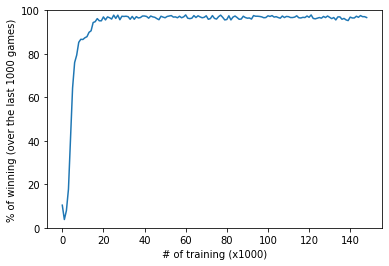

In [31]:
plt.plot(rates_4[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")

### 5. Comparing 3 different levels of trained QPlayers

In [47]:
Q_1 = pickle.load(open('q_weights', 'rb'))
N_1 = pickle.load(open('n_weights', 'rb'))
Q_2 = pickle.load(open('q3_weights', 'rb'))
N_2 = pickle.load(open('n3_weights', 'rb'))
Q_3 = pickle.load(open('q4_weights', 'rb'))
N_3 = pickle.load(open('n4_weights', 'rb'))

In [38]:
### Lv1
winners = np.array([0, 0, 0, 0, 0])
for i in range(10000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, QPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_1, 'N': N_1,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                       'learn': False}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
print((winners[3] / np.sum(winners)) * 100)

72.68


In [39]:
### Lv2
winners = np.array([0, 0, 0, 0, 0])
for i in range(10000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, QPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_2, 'N': N_2,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                       'learn': False}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
print((winners[3] / np.sum(winners)) * 100)

81.46


In [48]:
### Lv3
winners = np.array([0, 0, 0, 0, 0])
for i in range(10000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, QPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_3, 'N': N_3,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                       'learn': False}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
print((winners[3] / np.sum(winners)) * 100)

41.44


In [49]:
### Heuristic vs Lv1 vs Lv2 vs Lv3
winners = np.array([0, 0, 0, 0, 0])
for i in range(10000):
    sim = Simulator.from_start([HeuristicPlayer, QPlayer, QPlayer, QPlayer],
                             params=[{}, {'Q': Q_1, 'N': N_1,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                       'learn': False}, 
                                     {'Q': Q_2, 'N': N_2,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                       'learn': False},
                                       {'Q': Q_3, 'N': N_3,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                       'learn': False}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
print((winners[0] / np.sum(winners)) * 100)
print((winners[1] / np.sum(winners)) * 100)
print((winners[2] / np.sum(winners)) * 100)
print((winners[3] / np.sum(winners)) * 100)

1.72
20.200000000000003
58.56
18.490000000000002


In [50]:
### Lv3 vs 3*Lv2
winners = np.array([0, 0, 0, 0, 0])
for i in range(10000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, QPlayer],
                             params=[{'Q': Q_2, 'N': N_2,
                                        'c': .01,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.1,
                                        'learn': False}]*3 + \
                                       [{'Q': Q_3, 'N': N_3,
                                        'c': .1,
                                        'depth': 100,
                                        'num_simulations': 10,
                                        'alpha': 0.05,
                                        'learn': False}] * 1,
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
print((winners[3] / np.sum(winners)) * 100)

40.849999999999994


### 6. Training MCTSPlayer with 3 HeuristicPlayers

In [ ]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_6 = []
for i in range(1000):
    sim = Simulator.from_start([HeuristicPlayer, HeuristicPlayer, HeuristicPlayer, MCTSPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_new, 'N': N_new,
                                        'c': .1,
                                        'depth': 5,
                                        'num_simulations': 10,
                                        'alpha': 0.05}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 10 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_6.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)

pickle.dump(Q_new, open('q_weights_heu_mcts', 'wb'))
pickle.dump(N_new, open('n_weights_heu_mcts', 'wb'))

0
[0 0 1 0 0]
[0 0 1 0 0]
0.0
0.0
10
[0 2 9 0 0]
[0 2 8 0 0]
0.0
0.0
20
[ 0  3 18  0  0]
[0 1 9 0 0]
0.0
0.0
30
[ 0  7 24  0  0]
[0 4 6 0 0]
0.0
0.0
40
[ 0  8 33  0  0]
[0 1 9 0 0]
0.0
0.0
50
[ 0  9 41  1  0]
[0 1 8 1 0]
1.9607843137254901
10.0


In [ ]:
plt.plot(rates_6[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")

### 7. Training MCTSPlaying with 3 RandomPlayers

In [ ]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_7 = []
for i in range(150000):
    sim = Simulator.from_start([RandomPlayer, RandomPlayer, RandomPlayer, MCTSPlayer],
                             params=[{}, {}, {},
                                       {'Q': Q_new, 'N': N_new,
                                        'c': .1,
                                        'depth': 10,
                                        'num_simulations': 10,
                                        'alpha': 0.05}],
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 1000 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_7.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)

pickle.dump(Q_new, open('q1_weights_mcts', 'wb'))
pickle.dump(N_new, open('n1_weights_mcts', 'wb'))

In [ ]:
plt.plot(rates_7[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")

### 8. Training MCSTPlayer with 3 Lv1 MCSTPlayers

In [ ]:
Q_new = defaultdict(defaultdict(int).copy)  # action value estimates
N_new = defaultdict(defaultdict(int).copy)  # visit counts
Q_saved = pickle.load(open('q1_weights_mcts', 'rb'))
N_saved = pickle.load(open('n1_weights_mcts', 'rb'))

winners = np.array([0, 0, 0, 0, 0])
last = np.copy(winners)
rates_8 = []
for i in range(150000):
    sim = Simulator.from_start([MCSTPlayer, MCSTPlayer, MCSTPlayer, MCSTPlayer],
                             params=[{'Q': Q_saved, 'N': N_saved,
                                        'c': .01,
                                        'depth': 10,
                                        'num_simulations': 10,
                                        'alpha': 0.1,
                                        'learn': False}]*3 + \
                                       [{'Q': Q_new, 'N': N_new,
                                        'c': .1,
                                        'depth': 10,
                                        'num_simulations': 10,
                                        'alpha': 0.05}] * 1,
                               verbosity=0)
    winner = sim.run_game()
    winners[winner] += 1
    if i % 1000 == 0:
        print(i)
        print(winners)
        print(winners - last)
        print((winners[3] / np.sum(winners)) * 100)
        print(((winners - last)[3] / np.sum(winners - last)) * 100)
        rates_8.append(((winners - last)[3] / np.sum(winners - last)) * 100)
        last = np.copy(winners)
        
pickle.dump(Q_new, open('q2_weights_mcts', 'wb'))
pickle.dump(N_new, open('n2_weights_mcts', 'wb'))

In [ ]:
plt.plot(rates_8[1:])
plt.ylim(0, 100)
plt.xlabel("# of training (x1000)")
plt.ylabel("% of winning (over the last 1000 games)")